## **Sistemas de Visión practica #7**
Deteccion de lineas y circulos

In [3]:
import zipfile
import io

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


*Detección de lineas*

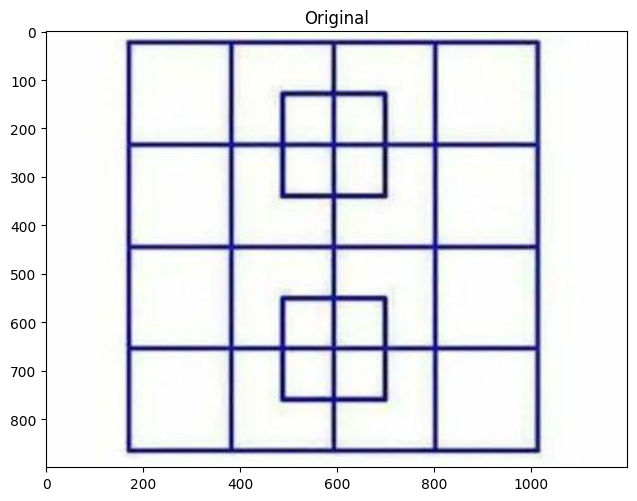

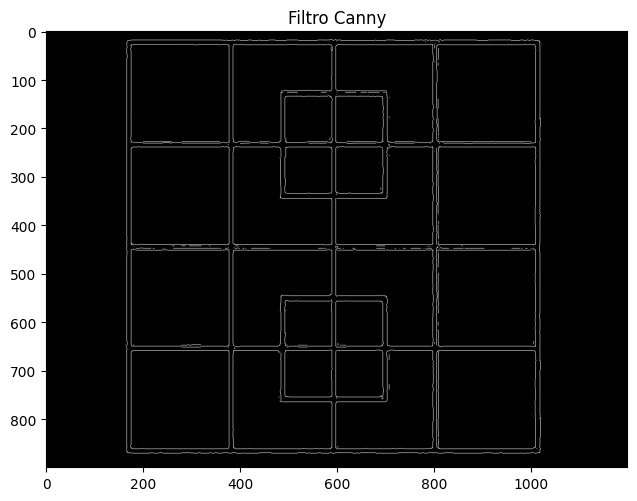

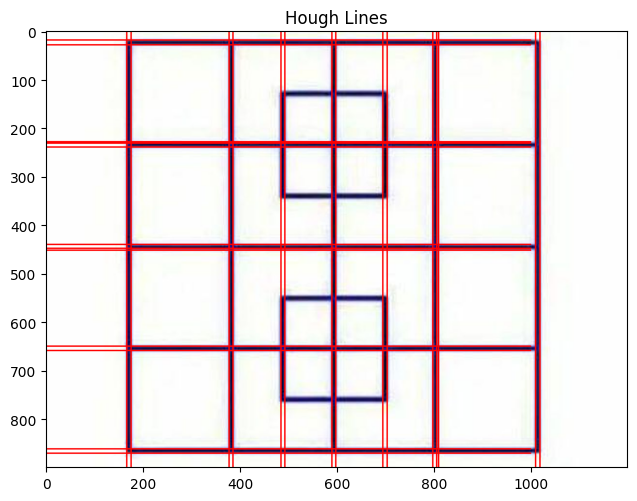

In [13]:
image = cv2.imread('fotos/cuadros.jpg')
imshow('Original', image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)

# Iteramos en todas las lineas y convertimos al formato requerido por el comando
#cv2.line (punto inicial y final)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

imshow('Filtro Canny', edges)
imshow('Hough Lines', image)

*Detección de circulos*

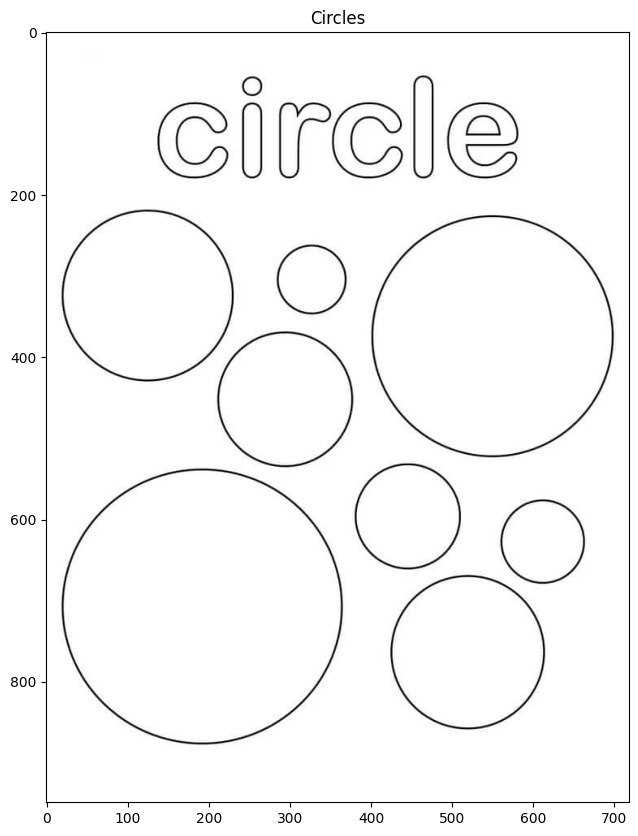

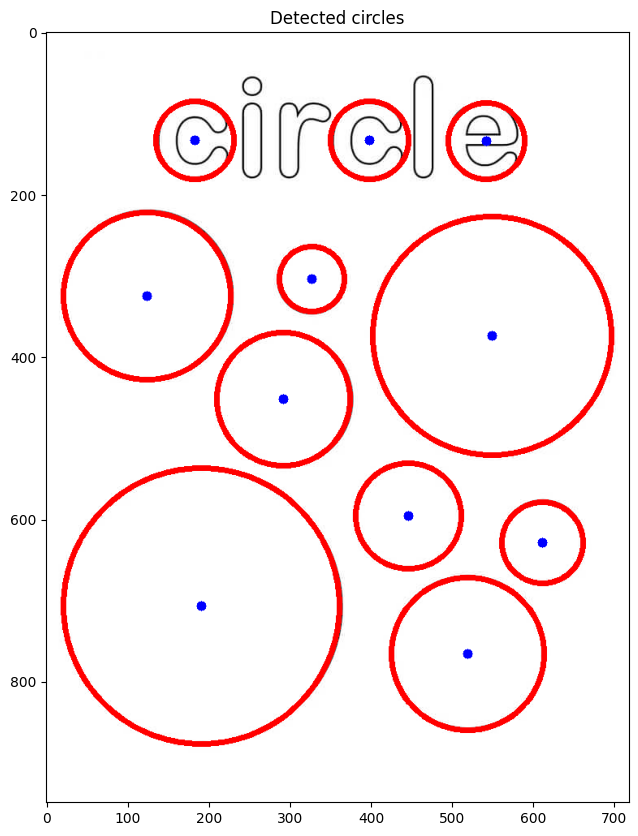

In [9]:
image = cv2.imread('fotos/circulos_2.jpg')
imshow('Circles', image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 25)

cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # Dibujamos circulo externo 
    cv2.circle(image,(i[0], i[1]), i[2], (0, 0, 255), 5)
    
    # Dibujamos circulo intero
    cv2.circle(image, (i[0], i[1]), 2, (255, 0, 0), 8)

imshow('Detected circles', image)